<a href="https://colab.research.google.com/github/MasahiroAraki/MLCourse/blob/master/05_generative-discriminative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第5章

Scikit learn の GaussianNBとLogisticRegression でirisデータを識別します。

## 準備

必要なライブラリ等を読み込みます。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

## データの読み込み

irisデータを読み込み、パターン行列をX, 正解ラベルベクトルをyとします。

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

## データの可視化

主成分分析を行って2次元データに変換し、散布図で表示します。

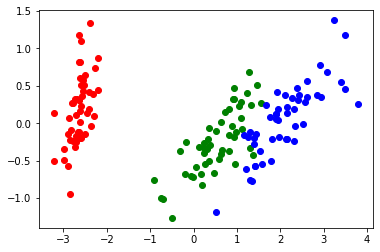

In [3]:
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)
plt.plot(X2[y==0,0], X2[y==0,1],"ro")
plt.plot(X2[y==1,0], X2[y==1,1],"go")
plt.plot(X2[y==2,0], X2[y==2,1],"bo")

## ナイーブベイズ

識別器のインスタンスを作成し、fitメソッドで動作を確認します。次に、交差確認法で性能を評価します。

In [4]:
clf1 = GaussianNB()
clf1.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [5]:
scores = cross_val_score(clf1, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.95 (+/- 0.09)


### 学習結果の表示

平均(theta)と分散(sigma)を表示します。

In [6]:
clf1.theta_

array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

In [7]:
clf1.sigma_

array([[0.121764, 0.140816, 0.029556, 0.010884],
       [0.261104, 0.0965  , 0.2164  , 0.038324],
       [0.396256, 0.101924, 0.298496, 0.073924]])

### ロジスティック識別

識別器のインスタンスを作成し、fitメソッドで動作を確認します。次に、交差確認法で性能を評価します。

In [8]:
clf2 = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
clf2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
scores = cross_val_score(clf2, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.97 (+/- 0.07)


### 学習結果の表示

重み(coef)と切片(intercept)を表示します。

In [10]:
clf2.coef_

array([[-0.42350475,  0.96745838, -2.5171573 , -1.07971951],
       [ 0.5344496 , -0.32161415, -0.20639044, -0.94431052],
       [-0.11094485, -0.64584423,  2.72354774,  2.02403003]])

In [11]:
clf2.intercept_

array([  9.84969124,   2.23747853, -12.08716976])

## 課題

scikit-learn付属のwineデータ、breast-cancerデータに対して生成モデル・識別モデルそれぞれで識別を行い、問題の難しさと適したモデルとの関係を考察してください。ただし、元のデータを使うと正解率が高く、モデルの違いがわかりにくいので、主成分分析で2次元に変換したデータを対象に識別を行ってください。